### 深度学习框架 Tensorflow 基础使用
- 目前深度学习还处于一个非常早期的，不成熟的阶段，所以我们会看到各种各样的人写着各种各样风格的代码。当我们想完成一个应用的时候，我们会有很多种方式和选择，有时候选择太多也不一定是好事，因为我们可能会面临选择的困难。虽然“条条大路通罗马”，但是有些路好走，有些路不 好走;有些路部分人觉得好走，部分人觉得不好走。很多时候我们很难判断哪条路好，哪条路不好。给大家举一个例子来说明这个问题，如下图所示：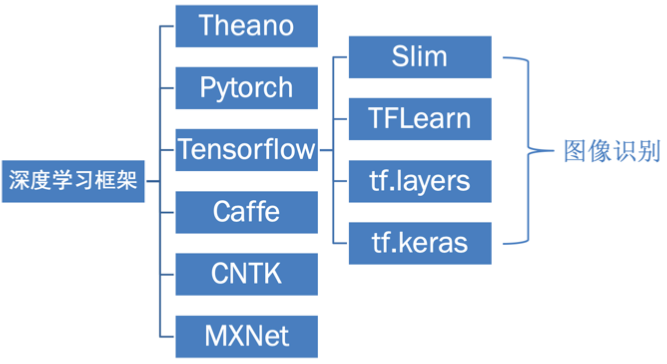
- 比如我们想做一个图像识别的应用，那么首先我们有很多种深度学习的框架可以选择。如果是在 2016-2017 年左右，那么这个选择还是挺难的，因为每个深度学习的框架都有自己 的优缺点，我们可能很难选择学习哪一个框架。当然，这个问题现在相对变得容易了，经过 时间的考验，现在业内公认的首选的深度学习框架就是 Tensorflow。
- 深度学习框架选好之后，接下来要继续选择，每个框架在实现某个具体应用的时候通常都会有很多种实现方式。比如如何载入数据进行数据预处理有很多种方法，如何搭建网络有很多种方法，如何训练模型又有很多种方法。在上图中，假设我们选择了 Tensorflow 作为我们的深度学习框架，那么我们在搭建网络结构的时候又可以选择使用 Tensorflow 的高级 API:Slim，TFLearn，tf.layers，tf.keras 或其他 API，最后完成图像识别的应用。由于各种方法比较多，我们全部都学并不是一个明智的选择，所以在课程中我会选择我认为比较容易理解和学习方法来教大家。
    - Tensorflow2.0 推出以后，谷歌官方建议大家使用 tf.keras 来搭建和训练模型。
    - 后面关于深度学习的应用大部分都会基于 tf.keras 的 API 完成。


#### Tensorflow 简介
- Tensorflow 的官网是:https://tensorflow.google.cn/
- Tensorflow 是谷歌基于 DisBelief 进行研发的第二代人工智能学习系统，并于 2015 年11 月 9 日开源。Tensorflow 可被用于图像识别，语音识别，文本处理等多项机器学习和深度 学习领域。并且可以运行在智能手机，个人电脑，数据中心服务器等各种设备上。
- 目前支持 Windows，MacOS，Linux 系统，支持 CPU/GPU 版本，支持单机和分布式版 本。
- Tensorflow 支持多种编程语言，目前有 Python，C++，GO，JAVA，R，SWIFT，JavaScript。 最主流的编程语言是 Python。目前 Tensorflow 支持 64 位的 Python3.5/3.6/3.7/3.8 版本。
- 2019 年 3 月 8 日，Google 发布最新 Tensorflow2.0-Alpha 版本，并在 2019 年 10 月 1 日发布了 Tensorflow2.0 正式版本。新版本的 Tensorflow 有很多新特性，更快更容易使用 更人性化。因为新版本的 Tensorflow 有较大的更新，所以老版的 Tensorflow 程序在新版本 中几乎都无法继续使用。
- 如果是作为一个初学者，那么我们应该先学 Tensorflow1 呢，还是直接学习 Tensorflow2。学习 Tensorflow1 的理由是现在网上的 Tensorflow 开源程序以及比较成熟 的 Tensorflow 项目基本上都是基于 Tensorflow1 的，Tensorflow2 刚出不久，资源相对来 说肯定会比较少一些。不过 Tensorflow2 肯定是未来发展的趋势，虽然现在还比较新，但是 我还是建议大家学习 Tensorflow2 为主。

- v1和v2的区别：静态图和动态图机制
    - 动态图机制：Tensorflow1 版本跟很多其他的“老”深度学习框架一样，都是使用静态图机制，而 Tensorflow2 版本使用现在最新潮的动态图机制。什么是动态图机制我觉得基本上不需要跟大家解释，动态图机制是一种跟我们平时写 Python 代码类似的一种机制，用起来很自然。

In [1]:
import tensorflow as tf # 创建一个常量
m1 = tf.constant([[4,4]]) # 创建一个常量
m2 = tf.constant([[2],[3]])
# 创建一个矩阵乘法，把 m1 和 m2 传入 
product = tf.matmul(m1,m2)
print(product)

tf.Tensor([[20]], shape=(1, 1), dtype=int32)


- 静态图机制：动态图程序看起来就跟一段普通的 Python 程序一样，没什么好特别说明的。不过静态图就没这么好理解了，因为静态图跟我们平时的编程习惯不符。在静态图机制中我们需要在一个计算图(Graph)中定义计算的流程，然后再创建一个会话(Session)，在会话中执行计算图的计算。
    - 图：TensorFlow 是一个编程系统，使用图 (graph) 来表示一个计算任务或者计算单元.
        - 计算任务：实现一个加法器，那任意值的加法运算就是一个计算任务
    - 会话：图必须要在会话中进行执行
    - tensor：就是numpy中的ndarray，只不过从新起了一个名字而已！因此tensor一种数据类型。每个 Tensor 是一个类型化的数组. 或者是op的返回值，就是TensorFlow中的数据。tensor也可以被称为张量，那么张量的阶就是数组的维度。
    - 节点op（operation）：图表示TensorFlow的计算任务，而一个计算任务的具体实现操作就是op。一个op需要使用0个或者多个Tensor来执行计算且会产生0个会多个Tensor，简单点来说TensorFlow的API定义的函数都是op。
    
- 综述：
    - 图描述了tensorflow计算的过程。为了进行计算, 图必须在会话里被启动.会话将图的op分发到诸如 CPU 或 GPU 之类的设备上, 图同时提供执行op的方法. 这些方法执行后, 将产生的 tensor 返回。

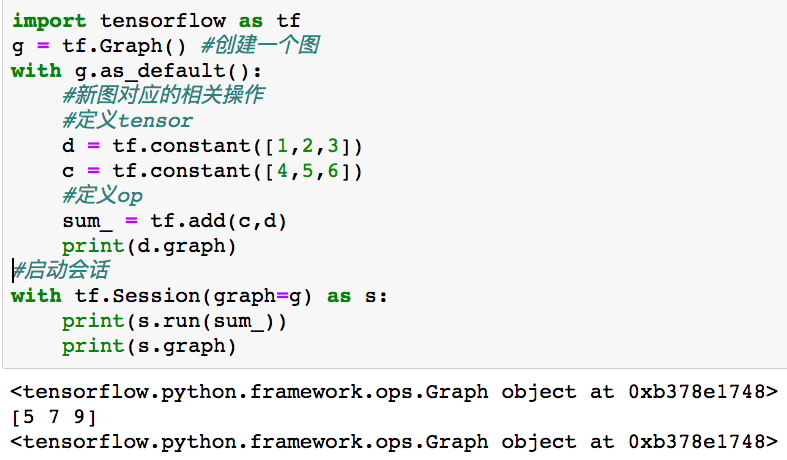

- 对比动态图和静态图这两个简单的程序我们就能看出还是动态图使用起来比较简单，也更 加自然。这也是深度学习框架未来的发展趋势，以后静态图机制应该会被慢慢淘汰

#### tf的高级API【tf.keras】
- 在说 tf.keras 之前我们先来说一下Keras，Keras 是所有深度学习框架中最容易使用，最初是由 Google AI 研究人员创建并开发的。并于 2015 年 3 月 27 日将 Keras 的第一个版本发布在GitHub上。Keras 是一个高度封装的深度学习框架且Keras 的易用性得到了广大深度学习研究开发者的认可，并引起了 Tensorflow 官方的注意。并从 Tensorflow1.10 版本开始加 入 tf.keras 接口，也就是我们在 Tensorflow 中也可以使用 Keras 的方式来搭建和训练模型。
- 不过 Keras 和 tf.keras 是分开的两个项目，它们使用起来基本上是一样的，只是在细节上 会有一些小的不同。随着 Tensorflow2.0 的推出，谷歌宣布 Keras 现在是Tensorflow 的官方高级API，用于快速简单的模型设计和训练，并推荐大家使用。
- 在 Tensorflow1.0 中如何完成我们的深度学习模型训练程序我们有非常多选择，Tensorflow2.0 把选择进行了简化，只保留了更好的几种。基于 Tensorflow 官方推荐以及我 个人的使用经验，我认为在 Tensorflow2.0 的使用中，我们可以尽量多使用 tf.keras 的接口来 完成我们的应用。
- 前面我介绍了很多关于 Keras/tf.keras 的优点，Keras/tf.keras 的缺点是程序运行效率会比纯 Tensorflow 程序要稍微慢一点点。这和容易理解，程序封装越多，用起来越方便，运行 起来自然就会慢一些。不过 Tensorflow 针对这个问题也做了很多优化，所以实际应用中其实纯 Tensorflow 和 tf.keras 速度的差距一般也不会很大。真正影响深度学习运行速度的主要影 响因素是模型的复杂度和硬件条件，tf.keras 对于速度基本上影响不会很大。

#### Tensorflow-cpu 在线安装
- 使用 Windows 安装 Tensorflow 的同学要注意，从 TensorFlow 2.1.0 版本开始，需要 安 装 vc_redist.x64.exe。进入链接https://aka.ms/vs/16/release/vc_redist.x64.exe 链接下载，下载后双击进行安装。
    - mac或者linux直接安装Visual Studio开发环境
- Tensorflow2.0 正式发布以后，现在 Tesnorflow 默认安装的版 本就是 Tensorflow2 的版本，安装 Tensorflow 可以用管理员方式打开命令提示符，运行如下 命令:
    - pip install tensorflow-cpu
    - 不过上面命令通常下载速度比较慢，推荐从国内源进行下载速度比较快，使用下面命令下载速度比较快:
        - pip install tensorflow-cpu -i https://pypi.douban.com/simple
- 顺利的话就运行完这段命令 tensorflow 就安装好了，安装好之后我们可以在命令行安装 的最后看到类似如下信息:
    - Successfully installed absl-py-0.8.1 cachetools-3.1.1 certifi-2019.11.28 gast-0.2.2 google-auth-1.9.0 google-auth-oauthlib-0.4.1 google-pasta-0.1.8 oauthlib-3.1.0 pyasn1-0.4.8 pyasn1-modules-0.2.7 requests-2.22.0 requests-oauthlib-1.3.0 rsa-4.0 tensorboard-2.0.2 tensorflow-2.0.0 urllib3-1.25.7
    - 假设安装没有问题，那么可以打开一个 python 的运行环境，比如 Jupyter，然后运行命 令:import tensorflow
        - 如果没有产生错误，那么就代表安装成功了。如果看到警告不要紧张，有警告是正常的， 一般警告都可以忽略掉

- Tensorflow-cpu 卸载
    - pip uninstall tensorflow-cpu
- Tensorflow-cpu 更新
    - pip install tensorflow-cpu –upgrade
- Tensorflow-cpu 指定版本的安装
    - pip install tensorflow==1.13.2

#### 安装过程中可能遇到的问题汇总
- 由于 Tensorflow 会不断地更新，每个 Tensorflow 版本我们可能会遇到的问题不同，每 个人的电脑环境也有所不同，所以我这里总结的问题不一定跟大家碰到的问题相同，也可能会 有缺漏，如果问题不同或者有缺漏，大家可以给我反馈，我再进行补充。
- 问题 1:在安装过程中出现
    - “ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.14.1 which is incompatible.ERROR: keras 2.2.2 has requirement keras-applications==1.0.4, but you'll have keras-applications 1.0.8 which is incompatible.”或者类似错误。
    - 解决方法:这类错误可以忽略不处理。
- 问题 2:在安装过程中出现
    - “ERROR: Cannot uninstall 'wrapt'. It is a distutils installedproject and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.”。
    - 解决方法:用管理员方式打开命令提示符，然后运行:
        - pip install wrapt --upgrade --ignore-installed
        - 然后再次运行:pip install tensorflow-cpu -i https://pypi.douban.com/simple
        - 如果出错的不是'wrapt'而是其他模块，类似的错误可以用类似的方法解决
- 问题 3:
    - 在安装过程中出现“distributed 1.21.8 requires msgpack,which is not installed.”类似错误
    - 解决方法:安装“msgpack“，打开命令提示符，然后运行:
        - pip install msgpack -i https://pypi.douban.com/simple
- 问题 4:
    - 某条命令在安装过程中出现“PermissionError:[WinError 5] 拒绝访问”。 
    - 解决方法:这个错误主要是权限问题，关闭所有 python 相关软件，重新用管理员方式打开命令提示符，然后再次运行该命令。
- 问题 5:
    - 在安装过程中模块下载中断并出现“ReadTimeoutError:HTTPSConnectionPoll”。 
    - 解决方法:由于下载的资源在国外，所以网速不好可能会导致下载连接超时，可以尝试重新运行命令再次下载安装。也可以使用国内的下载源进行安装，一般速度会比较快，运行下面 的命令使用国内的源进行安装:
        - pip install tensorflow-cpu -i https://pypi.douban.com/simple
- 问题 6:
    - 在安装过程中模块下载中断并出现“拒绝访问”。
    - 解决方法:系统权限问题，可以用管理员方式打开命令提示符，然后重新安装，或者是在安装命令后面加上“--user”，例如:
    - pip install tensorflow-cpu -i https://pypi.douban.com/simple --user
- 问题 7:
    - Tensorflow 安装成功后在 python 环境中运行 import tensorflow 后出现ImportError:cannot import name ‘dense_features’from ‘tensorflow.python.feature_column’
    - 解决方法:用管理员的方式打开命令提示符，先运行: 
        - pip uninstall tensorflow_estimator
    - 再运行
        - pip install tensorflow_estimator
- 问题 8：
    - Tensorflow 安装成功后在 python 环境中运行 import tensorflow 后出现 “ImportError: DLL load failed with error code -1073741795 和 ImportError: No module named '_pywrap_tensorflow_internal'”。
    - 解决方法:由于电脑 CPU 太老导致的错误，解决方法一是安装老版本的 Tensorflow，比 如 Tensorflow1.2.0 版本，但是不推荐。推荐的解决方法是换一台新一点的电脑。
- 问题 9：
    - Tensorflow 安装成功后在 python 环境中运行 import tensorflow 后出现: ERROR:root:Internal Python error in the inspect module.Below is the traceback from this internal error.
    - 或者是：Tensorflow 安装成功后在 python 环境中运行 import tensorflow 后出现 “ImportError:DLL load failed:找不到指定的模型”。
    - 解决方法:安装 vc_redist.x64.exe（Visual Studio环境），然后再重新安装 Tensorflow。

#### tensorflow的基本操作

In [2]:
import tensorflow as tf 
x = tf.Variable([1,2])
a = tf.constant([3,3]) #减法op
sub = tf.subtract(x, a) #加法op
add = tf.add(x,sub) 
print(sub) 
print(add)

tf.Tensor([-2 -1], shape=(2,), dtype=int32)
tf.Tensor([-1  1], shape=(2,), dtype=int32)


- tf的线性拟合效果

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD
# 使用 numpy 生成 100 个从 0-1 的随机点，作为 x 
x_data = np.random.rand(100)
# 生成一些随机扰动
noise = np.random.normal(0,0.01,x_data.shape) # 构建目标值，符合线性分布
y_data = x_data*0.1 + 0.2 + noise
# 画散点图
plt.scatter(x_data, y_data)
plt.show()

<Figure size 640x480 with 1 Axes>

cost: 0.23031733930110931
cost: 0.00142737478017807
cost: 0.000103860191302374
cost: 7.939252100186422e-05
cost: 7.894023292465135e-05


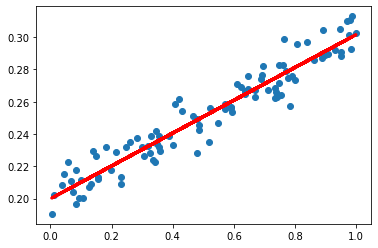

In [2]:
#构建一个顺序模型，顺序模型为 keras 中的基本模型结构，就像汉堡一样一层一层叠加网络
model = tf.keras.Sequential()
#add为添加一个网络层（输入层）
#units 为输出神经元个数，input_dim 为输入神经元个数
model.add(tf.keras.layers.Dense(units=1,input_dim=1))
#设置模型的优化器和损失函数，来优化损失，学习率为 0.03
# sgd:Stochastic gradient descent，随机梯度下降法
# mse:Mean Squared Error，均方误差
model.compile(optimizer=SGD(0.03),loss='mse')
# 训练 2001 个批次
for step in range(2001):
    # 训练一个批次数据，返回 cost 值
    cost = model.train_on_batch(x_data,y_data) 
    #每500个batch打印一次cost值
    if step % 500 == 0:
        print('cost:',cost)
# 使用 predict 对数据进行预测，得到预测值 y_pred
y_pred = model.predict(x_data)
# 显示随机点 
plt.scatter(x_data,y_data)
# 显示预测结果 
plt.plot(x_data,y_pred,'r-',lw=3) 
plt.show()

- 拟合非线性函数

In [2]:
%matplotlib inline

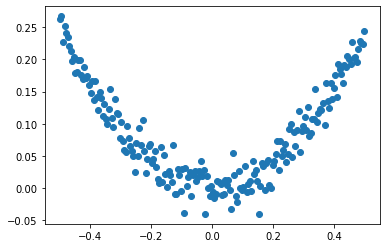

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD
# 使用 numpy 生成 200 个均匀分布的点，并新增一个维度 
x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]
# 生成一些跟 x_data 相同 shape 的随机值作为噪声数据 
noise = np.random.normal(0,0.02,x_data.shape)
# 构建目标值，符合非线性函数，另外再加上噪声值 
y_data = np.square(x_data) + noise
# 画散点图
plt.scatter(x_data,y_data)
plt.show()

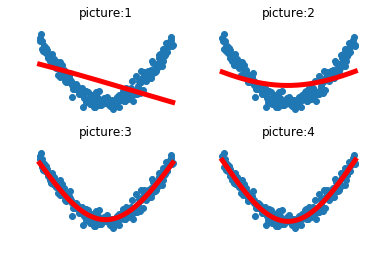

In [5]:
model = tf.keras.Sequential()
# 因为要做非线性回归，所以需要一个带有隐藏层的神经网络
# 并且需要使用非线性的激活函数，比如 tanh 函数
# keras 中 input_dim 只需要在输入层设置，后面的网络可以自动推断出该层对应的输入 
# keras 中定义网络结构已经默认设置好权值初始化，所以我们不需要额外进行设置 
#units=10则表示第二层隐层有10个神经元
model.add(tf.keras.layers.Dense(units=10,input_dim=1,activation='tanh')) 
model.add(tf.keras.layers.Dense(units=1,activation='tanh'))
#设置模型的优化器和代价函数，学习率为 0.1
model.compile(optimizer=SGD(0.3),loss='mse')
# 训练 3001 个批次
for step in range(3001):
    # 训练一个批次数据，返回 cost 值
    cost = model.train_on_batch(x_data,y_data) 
    #每1000个batch打印一次cost值
    if step % 1000 == 0:
        # 定义一个 2*2 的图，当前是第 i/1000+1 个图 
        plt.subplot(2,2,step/1000+1)
        # 把 x_data 喂到模型中获得预测值 
        prediction_value = model.predict(x_data)
        # 画散点图
        plt.scatter(x_data,y_data)
        # 画模型预测曲线图 
        plt.plot(x_data,prediction_value,'r-',lw=5) # 不显示坐标
        plt.axis('off')
        # 图片的标题设置
        plt.title("picture:" + str(int(step/1000+1)))
plt.show()

- 从结果中我们能看得出，随着权值的调整，模型的预测结果也在不断地调整，最终得到比较好的拟合效果。

- 简单 MNIST 数据集分类模型-keras 高级封装
    - 我们可以考虑先构建一个简单的神经网络，这个网络只有输入层和输出层，输入层有 784 个神经元，对应每张图片的 784 个像素点，输出层有 10 个神经元，对应 one-hot 的标签值， 如图 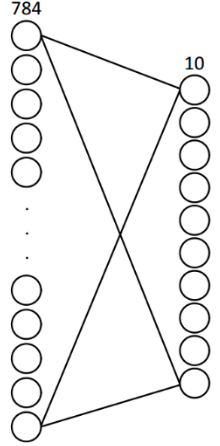

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
# 载入数据集
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 对训练集和测试集的数据进行归一化处理，有助于提升模型训练速度
x_train, x_test = x_train / 255.0, x_test / 255.0#缩减像素值大小
# 把训练集和测试集的标签转为独热编码
y_train = tf.keras.utils.to_categorical(y_train,num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test,num_classes=10)

# 模型定义
# 先用Flatten把数据从3维变成2维，(60000,28,28)->(60000,784)
# 设置输入数据形状input_shape不需要包含数据的数量，（28,28）即可
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation='softmax')
])

# sgd定义随机梯度下降法优化器
# loss='mse'定义均方差代价函数
# metrics=['accuracy']模型在训练的过程中同时计算准确率
sgd = SGD(0.2)
model.compile(optimizer=sgd,
              loss='mse',
              metrics=['accuracy'])

# 传入训练集数据和标签训练模型
# 周期大小为10（把所有训练集数据训练一次称为训练一个周期）
# 批次大小为32（每次训练模型传入32个数据进行训练）
# validation_data设置验证集数据
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test,y_test))



Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0387 - accuracy: 0.7643 - val_loss: 0.0219 - val_accuracy: 0.8785
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0205 - accuracy: 0.8794 - val_loss: 0.0177 - val_accuracy: 0.8981
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0178 - accuracy: 0.8926 - val_loss: 0.0160 - val_accuracy: 0.9034
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0165 - accuracy: 0.8990 - val_loss: 0.0152 - val_accuracy: 0.9086
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0157 - accuracy: 0.9030 - val_loss: 0.0145 - val_accuracy: 0.9105
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0151 - accuracy: 0.9065 - val_loss: 0.0141 - val_accuracy: 0.9123
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0146 - accuracy: 0.9093 - val_loss: 0.0137 - val_accuracy:

In [2]:
model.predict(x_test)

array([[1.99002257e-04, 2.59405937e-07, 2.40098641e-04, ...,
        9.95903313e-01, 1.39406009e-04, 1.31641200e-03],
       [7.09135784e-03, 3.96422147e-05, 9.49108243e-01, ...,
        1.91635880e-08, 2.98900041e-03, 9.60323405e-07],
       [2.02886702e-04, 9.41034257e-01, 2.30543241e-02, ...,
        3.30924662e-03, 1.05924020e-02, 2.11717747e-03],
       ...,
       [3.53564451e-06, 1.05483805e-05, 5.27462798e-05, ...,
        2.98723183e-03, 1.42662367e-02, 3.22273485e-02],
       [5.03002899e-03, 7.57708447e-03, 1.82729587e-03, ...,
        1.04743813e-03, 7.21426368e-01, 3.22712585e-03],
       [4.02623322e-04, 2.07363193e-08, 1.79109722e-03, ...,
        5.16393577e-08, 2.36835531e-05, 1.42995418e-06]], dtype=float32)

- 我们在程序运行时可以实时看到模型训练一共要训练多少个周期，当前 训练到第几个周期，当前周期的进度条，训练当前周期的剩余时间，当前训练集的准确率和 loss。 训练完一个周期之后可以看到训练一个周期所花费的时间，如果设置了验证集，可以看到验证 集的准确率和 loss。这些信息都是默认输出的，当然我们也可以把 fit 方法中的参数 verbose 设 置为 0，让模型训练过程中不输出任何信息。不过推荐大家还是保持默认值 berbose=1，毕竟 看到这些输出信息更有利于我们了解模型的训练情况。最后模型的测试集准确率大约是 92%左右，并不是特别高.如何可以进一步提升模型的效果，我们将在下一个章节介绍。